# Kunjungan Wisatawan dan Resident Australia secara Global dan Indonesia

## 1. Business Understanding

Tahap ini bertujuan untuk memahami latar belakang permasalahan serta tujuan analisis yang akan dilakukan.

Permasalahan:
1. Bagaimana tren total kunjungan wisatawan dan resident Global dan Indonesia secara keseluruhan dari tahun 1991 hingga 2025?
2. Bulan apa saja yang teridentifikasi sebagai periode puncak (peak season) dan titik terendah (low season) untuk kunjungan wisatawan dan resident secara secara Global dan Indonesia?
3. Bagaimana dampak pandemi COVID-19 terhadap tingkat kunjungan wisatawan dan resident secara Global dan Indonesia

Tujuan:
1. Mengidentifikasi pola pertumbuhan dan fluktuasi total kunjungan wisatawan dan resident secara global dan Indonesia dari tahun 1991 hingga 2025.
2. Menentukan bulan-bulan yang secara konsisten menjadi periode puncak (peak
season) dan periode sepi (low season) yang terjadi pada
kunjungan wisatawan dan resident (Global dan Indonesia).
3. Mengevaluasi dampak spesifik pandemi COVID-19 terhadap penurunan
kunjungan dari pasar Indonesia serta mengukur kecepatan pemulihannya
dibandingkan tren global.

## Data Understanding

Tahap ini bertujuan untuk memahami struktur, karakteristik, dan kondisi awal dataset sebelum dilakukan proses pembersihan data.

Informasi Dataset: Dataset yang digunakan merupakan data statistik pariwisata antara Australia dan Indonesia pada periode 1991–2025.

Sumber Dataset : KJRI Australia

Pada tahap ini, dilakukan pengecekan beberapa aspek penting seperti:

*   Missing values atau nilai kosong
*   Duplikasi data
*   Tipe data pada setiap kolom






### Persiapan dan Akses Dataset

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from collections import OrderedDict

In [ ]:
# Load datasets
df_final = pd.read_excel('/content/resident.xlsx', sheet_name = 'Final')

In [ ]:
# Cek Sample Data
df_final.head()

,Tanggal,Negara,Sum of JumlahResident,Sum of JumlahPengunjug
0,1991-01-01,Argentina,NaN,380.0
1,1991-02-01,Argentina,NaN,280.0
2,1991-03-01,Argentina,NaN,180.0
3,1991-04-01,Argentina,NaN,170.0
4,1991-05-01,Argentina,NaN,180.0


In [ ]:
# Jumlah baris dan kolom pada dataset
df_final.shape

(30230, 4)

In [ ]:
# Cek Missing Value
df_final.isnull().sum()

,0
Tanggal,0
Negara,0
Sum of JumlahResident,15188
Sum of JumlahPengunjug,1526


Penjelasan Mengenai Data yang Kosong (NaN)

Dalam dataset ini terdapat beberapa bagian yang tidak memiliki data (NaN), seperti:
- Kolom *"Jumlah Pengunjung Resident"* yang belum memiliki catatan pada tahun 1991–2007.
- Negara Austria tidak memiliki nilai pada kolom *"Jumlah Pengunjung Wisatawan"*.

Meskipun ada kekosongan, data tersebut tetap dipertahankan dengan alasan berikut:

1. **Agar timeline tetap utuh.**  
   Menghapus baris yang kosong bisa membuat periode waktu menjadi terputus. Dengan tetap menyimpannya, tren dari tahun awal hingga akhir tetap terlihat jelas.

2. **Biar struktur negara tetap konsisten.**  
  Meskipun hanya Austria yang tidak memiliki data pada variabel tertentu, negara tersebut tetap disertakan agar daftar negara tetap lengkap dan konsisten di seluruh proses analisis.

3. **Pengisian NaN menjadi 0 untuk stabilitas analisis.**  
   Nilai NaN diubah menjadi `0` supaya proses agregasi dan visualisasi berjalan lancar tanpa menghasilkan data yang aneh atau grafik yang terputus.

Secara keseluruhan, pendekatan ini menjaga grafik tetap rapi, dataset tetap lengkap, dan analisis lebih mudah dipahami.

In [ ]:
# Profiling Data Awal
print("INFO DATASET:")
df_final.info()

INFO DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30230 entries, 0 to 30229
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Tanggal                 30230 non-null  datetime64[ns]
 1   Negara                  30230 non-null  object        
 2   Sum of JumlahResident   15042 non-null  float64       
 3   Sum of JumlahPengunjug  28704 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 944.8+ KB


### Analisis Data

## Data Preparation dan EDA

### 3. Data Preparation
Tahap ini bertujuan untuk membersihkan dan mentransformasikan data agar siap
digunakan pada tahap analisis eksploratif.

Proses dilakukan dalam dua bagian:

*   Pembersihan data di Excel

    Menggunakan fungsi TEXTSPLIT untuk memisahkan namanegara agar struktur kolom menjadi lebih rapi dan Menghapus baris metadata seperti Unit, Series Type, dan informasilain yang memiliki nilai sama di seluruh kolom. Metadata ini tidakdiperlukan dalam analisis karena tidak berkontribusi terhadapvariabel utama.

*   Pemrosesan lebih lanjut di Google Colab

    Melakukan filter khusus untuk data Indonesia, Melakukan penyesuaian format tanggal agar sesuai standar, Melakukan agregasi sesuai kebutuhan visualisasi (misalnya agregasi tahunan atau bulanan).

### 4. EDA
Tahap ini bertujuan untuk mengeksplorasi data yang telah dibersihkan
guna mengidentifikasi pola, tren, dan insight yang relevan. Temuan dari tahap EDA digunakan sebagai dasar dalam menjawab pertanyaananalisis yang telah dirumuskan sebelumnya.

## Pertanyaan 1 :
## Bagaimana tren total kunjungan wisatawan dan resident secara keseluruhan dari tahun 1991 hingga 2025?

### Versi Wisatawan dan Resident Seluruh Negara

In [ ]:
# Mengisi nilai kosong pada kolom jumlah pengunjung
df_final['Sum of JumlahPengunjug'] = df_final['Sum of JumlahPengunjug'].fillna(0)
df_final['Sum of JumlahResident'] = df_final['Sum of JumlahResident'].fillna(0)

In [ ]:
# Copy data
df_tren = df_final.copy()

In [ ]:
# Extract Tahun
df_tren["Tahun"] = df_tren["Tanggal"].dt.year

In [ ]:
# Agregrasi
df_agg = df_tren.groupby('Tahun').agg({
    'Sum of JumlahPengunjug': 'sum',
    'Sum of JumlahResident': 'sum'
}).reset_index()

In [ ]:
def format_km(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    else:
        return int(x)

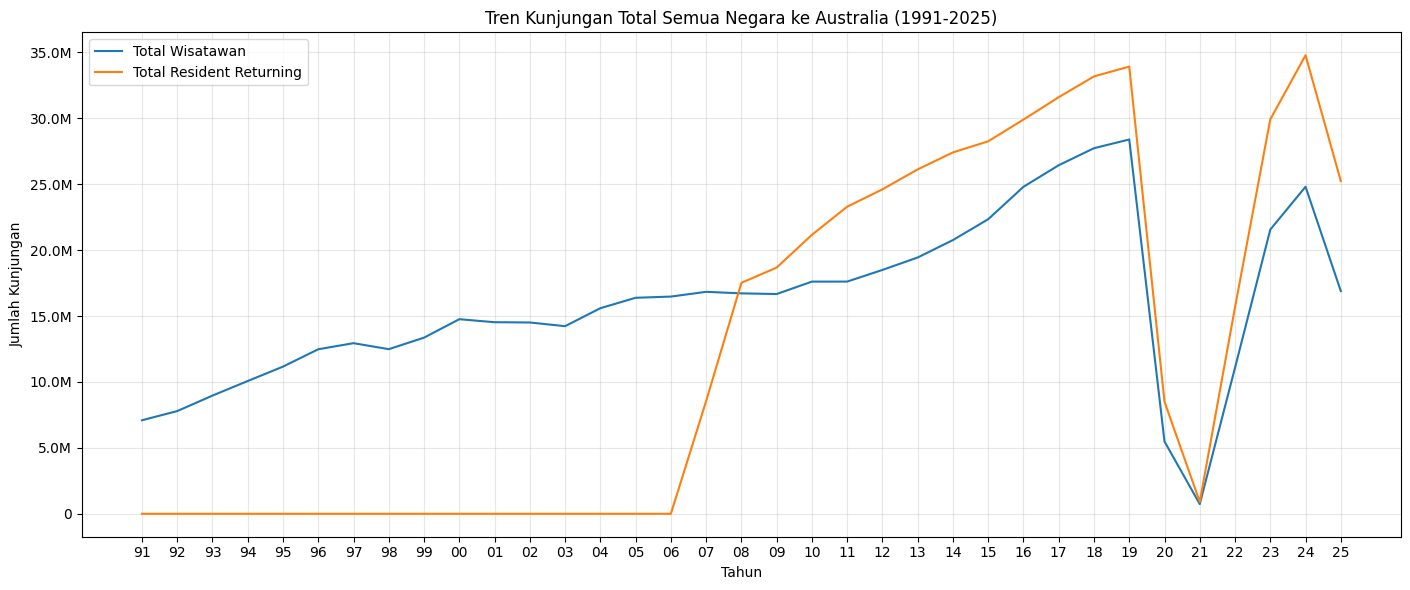

In [ ]:
# Plot
plt.figure(figsize=(14,6))
plt.plot(df_agg['Tahun'], df_agg['Sum of JumlahPengunjug'], label='Total Wisatawan')
plt.plot(df_agg['Tahun'], df_agg['Sum of JumlahResident'], label='Total Resident Returning')

plt.title("Tren Kunjungan Total Semua Negara ke Australia (1991-2025)")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Kunjungan")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

# Label tahun (2 digit)
plt.xticks(df_agg["Tahun"], [str(t)[2:] for t in df_agg["Tahun"]])

# FORMAT Y-AXIS K / M
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_km))

plt.show()

Insight :

Tren tahunan menunjukkan adanya fluktuasi jangka panjang dalam pergerakan wisatawan dan resident dari berbagai negara menuju Australia. Sepanjang periode 1991–2019, pola pertumbuhan cenderung stabil meskipun terdapat naik-turun. Penurunan paling drastis terjadi pada tahun 2020–2021, ketika pandemi COVID-19 menyebabkan pembatasan perjalanan internasional sehingga kunjungan menurun hampir secara total. Memasuki 2022 hingga 2025, terlihat pemulihan bertahap meskipun belum kembali sepenuhnya ke level pra-pandemi. Intinya, grafik ini menunjukkan kalau pandemi benar-benar menghantam mobilitas global, tapi setelah Australia buka lagi perbatasannya, pergerakan orang mulai pulih pelan-pelan.

### Versi Wisatawan dan Resident Indonesia

In [ ]:
# Filter Negara = Indonesia
df_ind = df_final[df_final["Negara"] == "Indonesia"].copy()

In [ ]:
# Extract Tahun
df_ind["Tahun"] = df_ind["Tanggal"].dt.year

In [ ]:
df_ind.head()

,Tanggal,Negara,Sum of JumlahResident,Sum of JumlahPengunjug,Tahun
7508,1991-01-01,Indonesia,0.0,3180.0,1991
7509,1991-02-01,Indonesia,0.0,2590.0,1991
7510,1991-03-01,Indonesia,0.0,2070.0,1991
7511,1991-04-01,Indonesia,0.0,3770.0,1991
7512,1991-05-01,Indonesia,0.0,1720.0,1991


In [ ]:
# Agregrasi
df_ind_sum = df_ind.groupby('Tahun').agg({
    'Sum of JumlahPengunjug': 'sum',
    'Sum of JumlahResident': 'sum'
}).reset_index()

In [ ]:
df_ind_sum.head()

,Tahun,Sum of JumlahPengunjug,Sum of JumlahResident
0,1991,36990.0,0.0
1,1992,45850.0,0.0
2,1993,71550.0,0.0
3,1994,105710.0,0.0
4,1995,134950.0,0.0


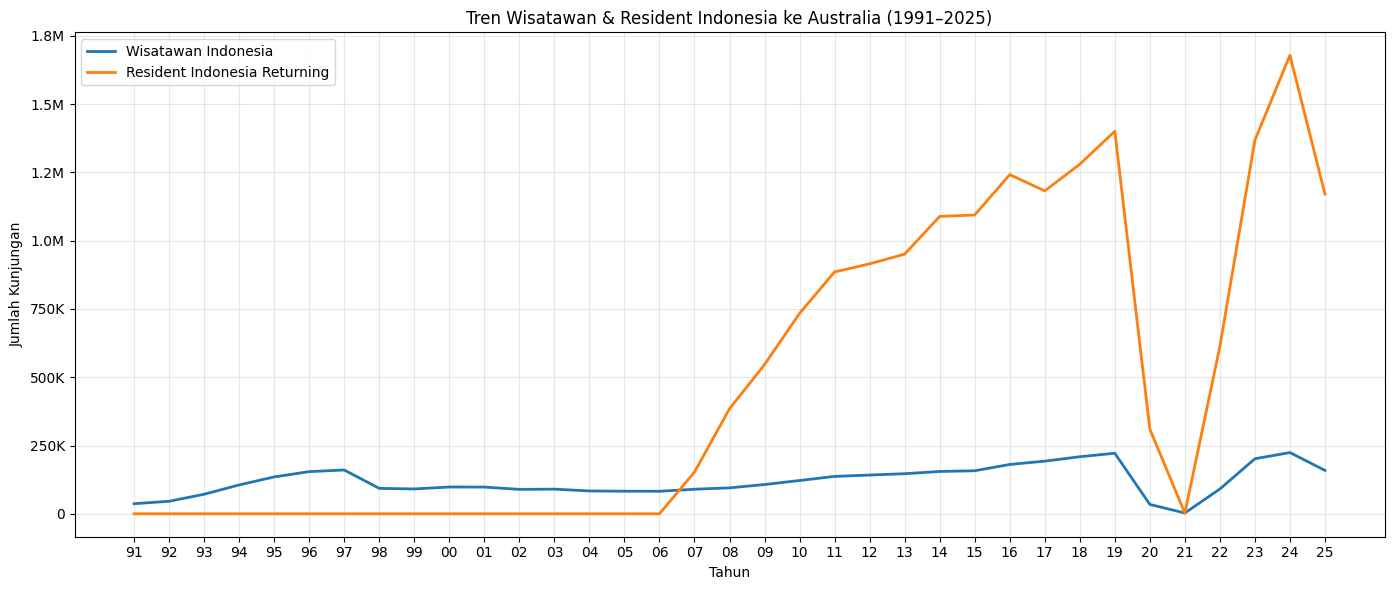

In [ ]:
# Plot
plt.figure(figsize=(14,6))

plt.plot(df_ind_sum["Tahun"], df_ind_sum["Sum of JumlahPengunjug"],
         label="Wisatawan Indonesia", linewidth=2)

plt.plot(df_ind_sum["Tahun"], df_ind_sum["Sum of JumlahResident"],
         label="Resident Indonesia Returning", linewidth=2)

plt.title("Tren Wisatawan & Resident Indonesia ke Australia (1991–2025)")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Kunjungan")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Label tahun (2 digit)
plt.xticks(df_ind_sum["Tahun"], [str(t)[2:] for t in df_ind_sum["Tahun"]])

# FORMAT Y-AXIS  K / M
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_km))

plt.show()

Insight :

Wisatawan Indonesia memperlihatkan peningkatan jangka panjang yang lebih konsisten menjelang era 2010–2019, kemudian mengalami penurunan tajam pada 2020 akibat pandemi. Setelah itu, mulai tahun 2022 terlihat adanya rebound, terutama pada kategori resident returning yang pulih lebih cepat dibanding wisatawan. Tandanya mobilitas orang Indonesia ke Australia makin kembali normal.

## Pertanyaan 2 :
## Bulan apa saja yang menjadi puncak dan titik terendah kunjungan wisatawan dan resident?

### Versi Wisatawan dan Resident Seluruh Negara

In [ ]:
# Copy Data
df_q2 = df_final.copy()

In [ ]:
# Extract Nama Bulan
df_q2["Bulan"] = df_q2["Tanggal"].dt.month_name()

In [ ]:
# Agregasi Per Bulan
df_global_month = df_q2.groupby("Bulan").agg({
    "Sum of JumlahPengunjug": "sum",
    "Sum of JumlahResident": "sum"
}).reset_index()

In [ ]:
# Urutkan bulan
bulan_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
df_global_month["Bulan"] = pd.Categorical(df_global_month["Bulan"], categories=bulan_order, ordered=True)
df_global_month = df_global_month.sort_values("Bulan")

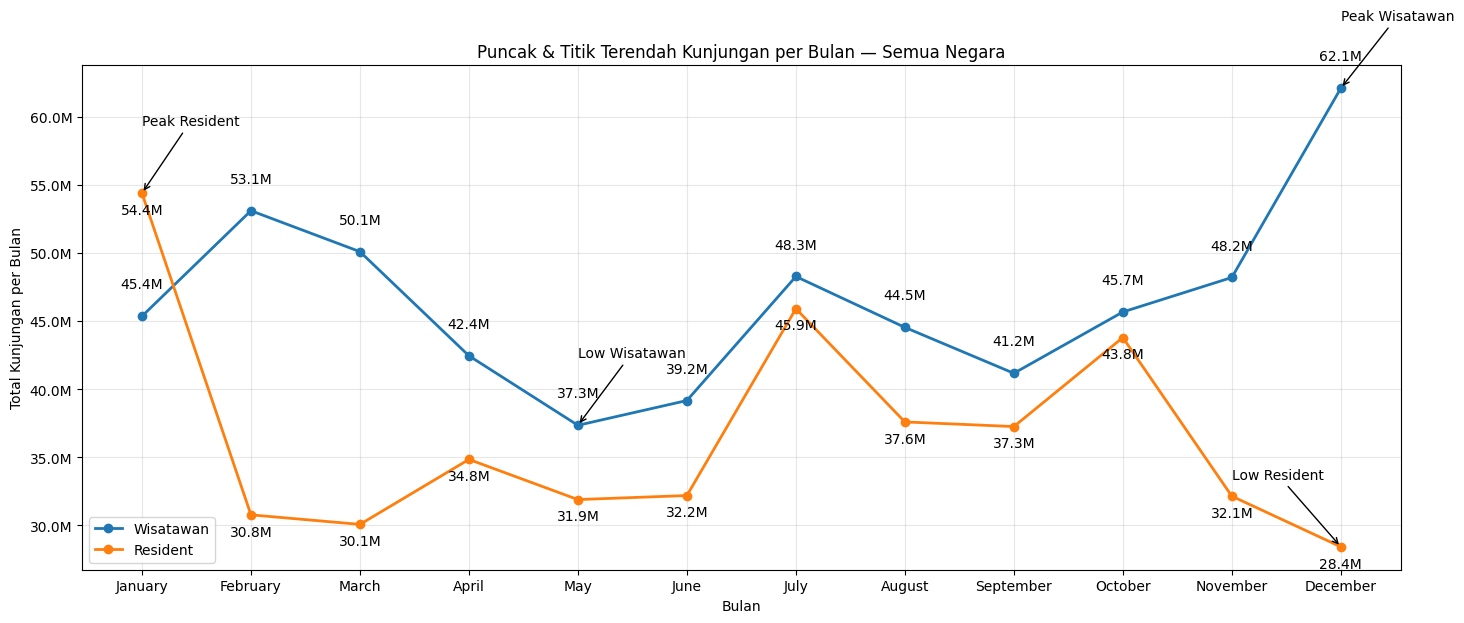

In [ ]:
plt.figure(figsize=(14,6))

plt.plot(df_global_month["Bulan"],
         df_global_month["Sum of JumlahPengunjug"],
         label="Wisatawan",
         linewidth=2,
         marker='o'
         )

plt.plot(df_global_month["Bulan"], df_global_month["Sum of JumlahResident"],
         label="Resident", linewidth=2, marker='o')

plt.title("Puncak & Titik Terendah Kunjungan per Bulan — Semua Negara")
plt.xlabel("Bulan")
plt.ylabel("Total Kunjungan per Bulan")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()

# Format Y-axis K/M
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_km))

# Ambil nilai peak & low
# Wisatawan
peak_wis_y = df_global_month.loc[df_global_month["Bulan"] == "December", "Sum of JumlahPengunjug"].values[0]
low_wis_y  = df_global_month.loc[df_global_month["Bulan"] == "May", "Sum of JumlahPengunjug"].values[0]

# Resident
peak_res_y = df_global_month.loc[df_global_month["Bulan"] == "January", "Sum of JumlahResident"].values[0]
low_res_y  = df_global_month.loc[df_global_month["Bulan"] == "December", "Sum of JumlahResident"].values[0]


# Tambahkan label angka pada setiap titik Wisatawan
for i, row in df_global_month.iterrows():
    bulan = row["Bulan"]
    y_wis = row["Sum of JumlahPengunjug"]
    label = format_km(y_wis, 0)

    plt.annotate(label,
                 xy=(bulan, y_wis),
                 xytext=(0, 20),
                 textcoords="offset points",
                 ha='center')

# Tambahkan label angka pada setiap titik Resident
for i, row in df_global_month.iterrows():
    bulan = row["Bulan"]
    y_res = row["Sum of JumlahResident"]
    label = format_km(y_res, 0)

    plt.annotate(label,
                 xy=(bulan, y_res),
                 xytext=(0, -15),
                 textcoords="offset points",
                 ha='center')


# ANOTASI PANAH
plt.annotate("Peak Wisatawan",
             xy=("December", peak_wis_y),
             xytext=("December", peak_wis_y + 5_000_000),
             arrowprops=dict(arrowstyle="->"))

plt.annotate("Low Wisatawan",
             xy=("May", low_wis_y),
             xytext=("May", low_wis_y + 5_000_000),
             arrowprops=dict(arrowstyle="->"))

plt.annotate("Peak Resident",
             xy=("January", peak_res_y),
             xytext=("January", peak_res_y + 5_000_000),
             arrowprops=dict(arrowstyle="->"))

plt.annotate("Low Resident",
             xy=("December", low_res_y),
             xytext=("November", low_res_y + 5_000_000),
             arrowprops=dict(arrowstyle="->"))

plt.show()

Insight :

Kalau lihat pola bulanan, negara-negara lain paling banyak datang ke Australia pas Desember (karena liburan), dan paling sepi di bulan Mei. Tapi untuk resident returning ceritanya beda. Mereka justru paling ramai balik di Januari karena banyak yang harus mulai kuliah atau kerja lagi. Sebaliknya, Desember jadi bulan paling sepi karena banyak resident pulang kampung buat liburan akhir tahun. Jadi wajar banget pola kedua kelompok ini beda jauh karena dipengaruhi liburan dan kuliah atau kerja.

### Versi Wisatawan dan Resident Indonesia



In [ ]:
# Extract Nama Bulan
df_ind["Bulan"] = df_ind["Tanggal"].dt.month_name()

In [ ]:
# Agregasi
df_ind_month = df_ind.groupby("Bulan").agg({
    "Sum of JumlahPengunjug": "sum",
    "Sum of JumlahResident": "sum"
}).reset_index()

In [ ]:
# Urutkan bulan
df_ind_month["Bulan"] = pd.Categorical(df_ind_month["Bulan"], categories=bulan_order, ordered=True)
df_ind_month = df_ind_month.sort_values("Bulan")

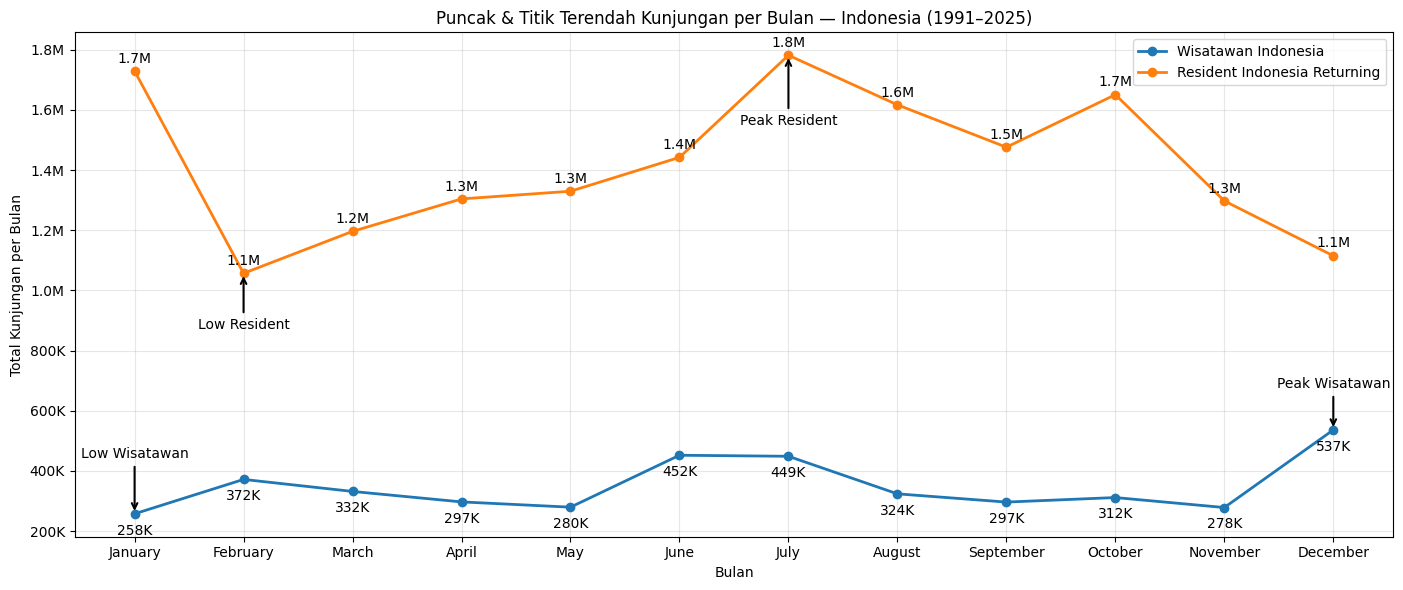

In [ ]:
plt.figure(figsize=(14,6))

# Garis Wisatawan
plt.plot(df_ind_month["Bulan"], df_ind_month["Sum of JumlahPengunjug"],
         label="Wisatawan Indonesia", linewidth=2, marker='o')

# Garis Resident
plt.plot(df_ind_month["Bulan"], df_ind_month["Sum of JumlahResident"],
         label="Resident Indonesia Returning", linewidth=2, marker='o')

plt.title("Puncak & Titik Terendah Kunjungan per Bulan — Indonesia (1991–2025)")
plt.xlabel("Bulan")
plt.ylabel("Total Kunjungan per Bulan")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_km))

# Peak & Low otomatis
peak_wis_idx = df_ind_month["Sum of JumlahPengunjug"].idxmax()
low_wis_idx  = df_ind_month["Sum of JumlahPengunjug"].idxmin()

peak_res_idx = df_ind_month["Sum of JumlahResident"].idxmax()
low_res_idx  = df_ind_month["Sum of JumlahResident"].idxmin()

# Ambil nilainya
peak_wis_x = df_ind_month["Bulan"][peak_wis_idx]
peak_wis_y = df_ind_month["Sum of JumlahPengunjug"][peak_wis_idx]

low_wis_x = df_ind_month["Bulan"][low_wis_idx]
low_wis_y = df_ind_month["Sum of JumlahPengunjug"][low_wis_idx]

peak_res_x = df_ind_month["Bulan"][peak_res_idx]
peak_res_y = df_ind_month["Sum of JumlahResident"][peak_res_idx]

low_res_x = df_ind_month["Bulan"][low_res_idx]
low_res_y = df_ind_month["Sum of JumlahResident"][low_res_idx]

# Label angka per titik
for i, row in df_ind_month.iterrows():

    plt.annotate(format_km(row["Sum of JumlahPengunjug"], 0),
                 xy=(row["Bulan"], row["Sum of JumlahPengunjug"]),
                 xytext=(0, -15),
                 ha='center', textcoords="offset points")

    plt.annotate(format_km(row["Sum of JumlahResident"], 0),
                 xy=(row["Bulan"], row["Sum of JumlahResident"]),
                 xytext=(0, 6),
                 ha='center', textcoords="offset points")


# ANOTASI PANAH
arrow_style = dict(arrowstyle="->", lw=1.5)

plt.annotate("Peak Wisatawan",
             xy=(peak_wis_x, peak_wis_y),
             xytext=(0, 30),
             textcoords="offset points",
             ha='center',
             arrowprops=arrow_style)

plt.annotate("Low Wisatawan",
             xy=(low_wis_x, low_wis_y),
             xytext=(0, 40),
             textcoords="offset points",
             ha='center',
             arrowprops=arrow_style)

plt.annotate("Peak Resident",
             xy=(peak_res_x, peak_res_y),
             xytext=(0, -50),
             textcoords="offset points",
             ha='center',
             arrowprops=arrow_style)

plt.annotate("Low Resident",
             xy=(low_res_x, low_res_y),
             xytext=(0, -40),
             textcoords="offset points",
             ha='center',
             arrowprops=arrow_style)

plt.show()

Insight :

Buat WNI, wisatawan paling ramai dateng pas Desember, wajar banget karena liburan sekolah dan perayaan akhir tahun. sedangkan titik terendah justru terjadi pada Januari, karena banyak orang yang sudah balik ke Indonesia. Di sisi lain, resident Indonesia yang kembali ke Australia menunjukkan puncak kunjungan pada Juli, yang berkaitan dengan libur tengah tahun dan dimulainya semester baru, sementara titik terendah tercatat pada Februari. Intinya, wisatawan dan resident punya alasan jalan-jalan yang beda, wisatawan karena liburan, yang satu karena urusan kuliah/kerja.

## Pertanyaan 3 :
## Bagaimana dampak pandemi COVID-19 terhadap tingkat kunjungan wisatawan dan resident?

### Versi Wisatawan dan Resident Seluruh Negara

/tmp/ipython-input-3192070691.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_global = df_global.groupby(pd.Grouper(key="Tanggal", freq="M")).agg({


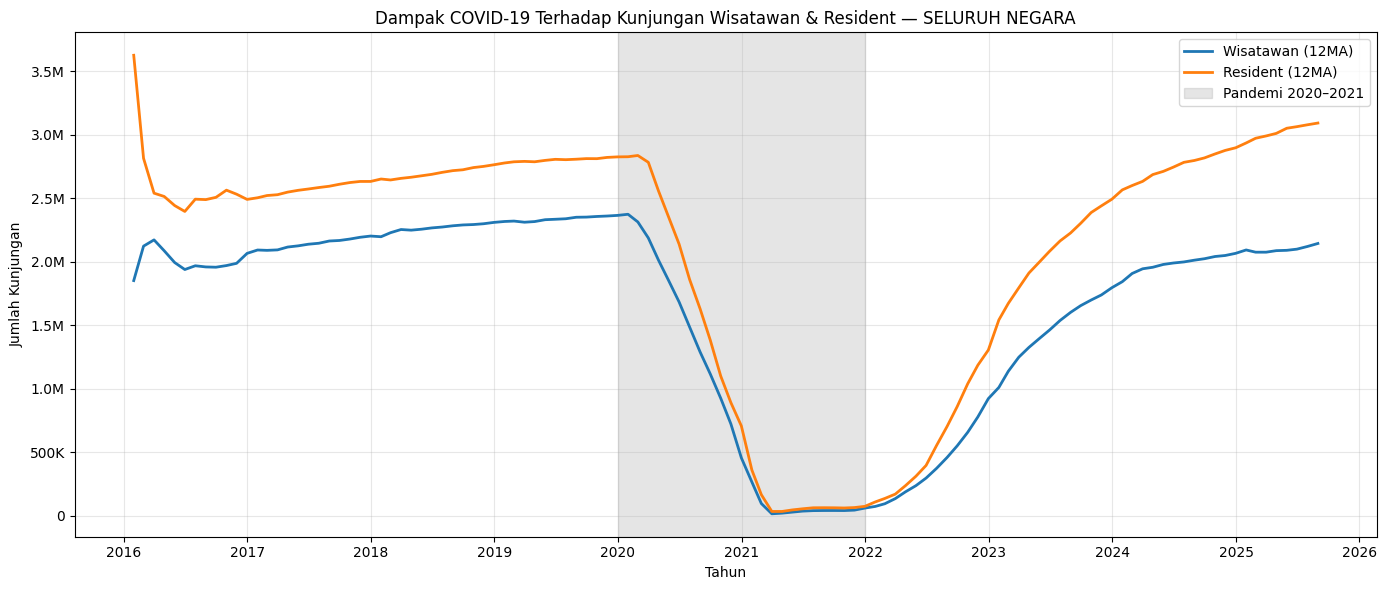

In [ ]:
df_global = df_final.copy()

# FILTER DATA 2016–2025 SAJA
df_global = df_global[(df_global["Tanggal"] >= "2016-01-01") &
                      (df_global["Tanggal"] <= "2025-12-31")]

# DEFINISI PERIODE
pre_start, pre_end = "2016-01-01", "2019-12-31"
pand_start, pand_end = "2020-01-01", "2021-12-31"
post_start, post_end = "2022-01-01", "2025-12-31"

# AGREGASI BULANAN
monthly_global = df_global.groupby(pd.Grouper(key="Tanggal", freq="M")).agg({
    "Sum of JumlahPengunjug": "sum",
    "Sum of JumlahResident": "sum"
}).reset_index()

monthly_global["MA_Wis"] = monthly_global["Sum of JumlahPengunjug"].rolling(12, min_periods=1).mean()
monthly_global["MA_Res"] = monthly_global["Sum of JumlahResident"].rolling(12, min_periods=1).mean()

# VISUALISASI GLOBAL
plt.figure(figsize=(14,6))

plt.plot(monthly_global["Tanggal"], monthly_global["MA_Wis"], linewidth=2, label="Wisatawan (12MA)")
plt.plot(monthly_global["Tanggal"], monthly_global["MA_Res"], linewidth=2, label="Resident (12MA)")

# Shaded area pandemi
plt.axvspan(pd.to_datetime(pand_start), pd.to_datetime(pand_end),
            alpha=0.2, color="gray", label="Pandemi 2020–2021")

plt.title("Dampak COVID-19 Terhadap Kunjungan Wisatawan & Resident — SELURUH NEGARA")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Kunjungan")
plt.legend()
plt.grid(alpha=0.3)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_km))
plt.tight_layout()
plt.show()

Insight :

Grafik moving average 12 bulan untuk kunjungan global memberikan gambaran yang lebih halus mengenai dinamika jangka panjang sebelum, selama, dan sesudah pandemi. Penurunan tajam terlihat sangat jelas pada awal 2020, menandai fase ketika perjalanan internasional praktis terhenti. Tren wisatawan menunjukkan penurunan yang lebih ekstrem dibanding resident, mengingat kebijakan border Australia saat itu masih memungkinkan resident atau warga tetap untuk masuk melalui skema repatriasi. Setelah 2022, kurva mulai naik kembali secara konsisten, menunjukkan fase pemulihan global. Tapi pemulihannya tidak secepat penurunannya, jadi industri pariwisata internasional butuh waktu lebih lama buat balik ke stabil.

### Versi Wisatawan dan Resident Indonesia

/tmp/ipython-input-3836981220.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ind = df_ind.groupby(pd.Grouper(key="Tanggal", freq="M")).agg({


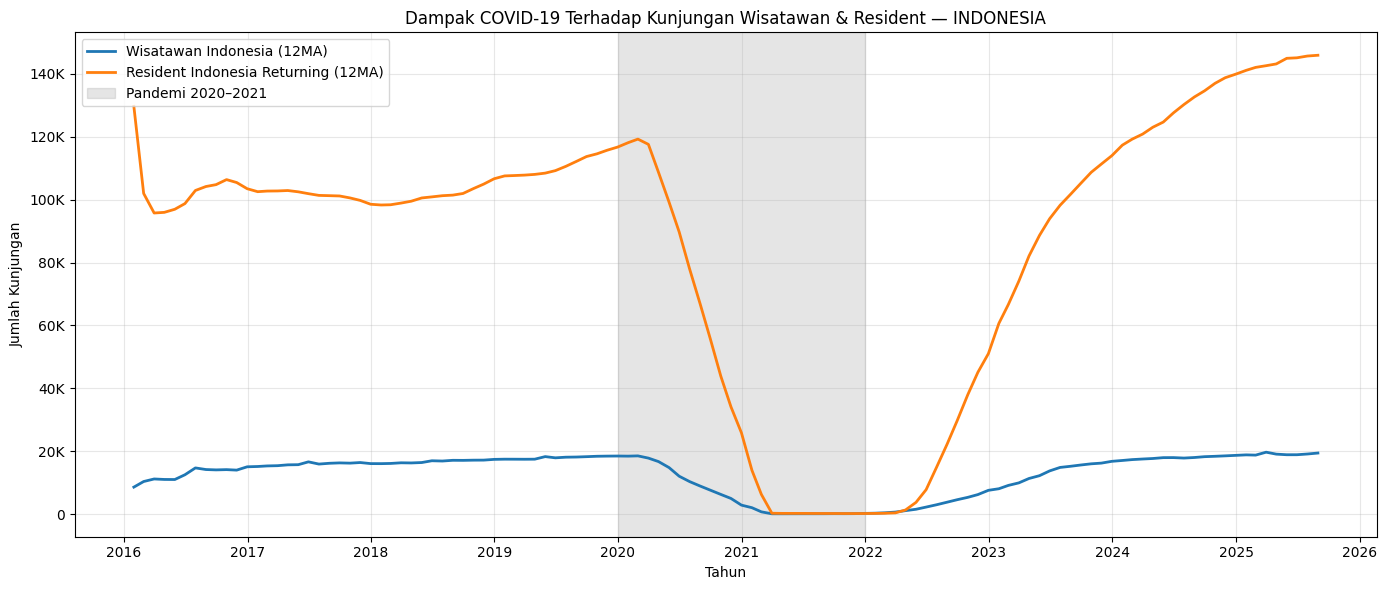

In [ ]:
# FILTER 2016–2025
df_ind = df_ind[(df_ind["Tanggal"] >= "2016-01-01") &
                (df_ind["Tanggal"] <= "2025-12-31")]

# DEFINISI PERIODE
pre_start, pre_end = "2016-01-01", "2019-12-31"
pand_start, pand_end = "2020-01-01", "2021-12-31"
post_start, post_end = "2022-01-01", "2025-12-31"

# AGREGASI BULANAN
monthly_ind = df_ind.groupby(pd.Grouper(key="Tanggal", freq="M")).agg({
    "Sum of JumlahPengunjug": "sum",
    "Sum of JumlahResident": "sum"
}).reset_index()

monthly_ind["MA_Wis"] = monthly_ind["Sum of JumlahPengunjug"].rolling(12, min_periods=1).mean()
monthly_ind["MA_Res"] = monthly_ind["Sum of JumlahResident"].rolling(12, min_periods=1).mean()

# VISUALISASI INDONESIA
plt.figure(figsize=(14,6))

plt.plot(monthly_ind["Tanggal"], monthly_ind["MA_Wis"], linewidth=2, label="Wisatawan Indonesia (12MA)")
plt.plot(monthly_ind["Tanggal"], monthly_ind["MA_Res"], linewidth=2, label="Resident Indonesia Returning (12MA)")

# Shade pandemi
plt.axvspan(pd.to_datetime(pand_start), pd.to_datetime(pand_end),
            alpha=0.2, color="gray", label="Pandemi 2020–2021")

plt.title("Dampak COVID-19 Terhadap Kunjungan Wisatawan & Resident — INDONESIA")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Kunjungan")
plt.legend()
plt.grid(alpha=0.3)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_km))
plt.tight_layout()
plt.show()

Insight :

Grafik moving average untuk Indonesia menunjuukan pola yang mirip kayak tren global, tapi tetap punya ciri khas sendiri. Penurunan tajam terjadi pada 2020–2021, ketika WNI tidak dapat memasuki Australia kecuali yang statusnya resident atau melalui repatriasi. Begitu masuk 2022, resident Indonesia mulai pulih lebih cepat, biasanya karena balik kuliah, kerja, atau pemegang izin tinggal. Sementara wisatawan Indonesia pulihnya lebih pelan, mengikuti ritme bangkitnya sektor pariwisata. Jadi secara keseluruhan, pandemi bukan cuma bikin jumlah kunjungan turun drastis, tapi juga ngubah pola dan karakter mobilitas WNI ke Australia.